# DTree Regressor Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeRegressor` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


np.random.seed(1)

## 2.0 Load data

In [2]:
X_train = pd.read_csv('./data/airbnb_train_X_price.csv') 
y_train = pd.read_csv('./data/airbnb_train_y_price.csv') 
X_test = pd.read_csv('./data/airbnb_test_X_price.csv') 
y_test = pd.read_csv('./data/airbnb_test_y_price.csv') 

In [3]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

## 3.0 Model the data

Conduct an initial random search across a wide range of possible parameters.

In [4]:
Dtree = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5).fit(X_train, np.ravel(y_train))

In [9]:
from sklearn.metrics import mean_squared_error

print(f"The best mean_squared_error score is {mean_squared_error(y_test, Dtree.predict(X_test))}")

The best mean_squared_error score is 5333.032471533859


## DTree random search

In [13]:
score_measure = "neg_mean_squared_error"
kfolds = 5

param_grid = {
    'min_samples_split': [1,10,50,100,200],  
    'min_samples_leaf': [1,5,10,20,50],
    'min_impurity_decrease': [0.0001, 0.0005, 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50,100,200], 
    'max_depth': [5,10,20,30],
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
}
 

dtree = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
490 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
490 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float i

The best neg_mean_squared_error score is -4854.5225321810385
... with parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'min_impurity_decrease': 0.0005, 'max_leaf_nodes': 200, 'max_depth': 10, 'criterion': 'absolute_error'}


Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

## features

In [14]:
np.round(rand_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.08, 0.58, 0.01, 0.1 , 0.06, 0.  , 0.  , 0.02,
       0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## diagram

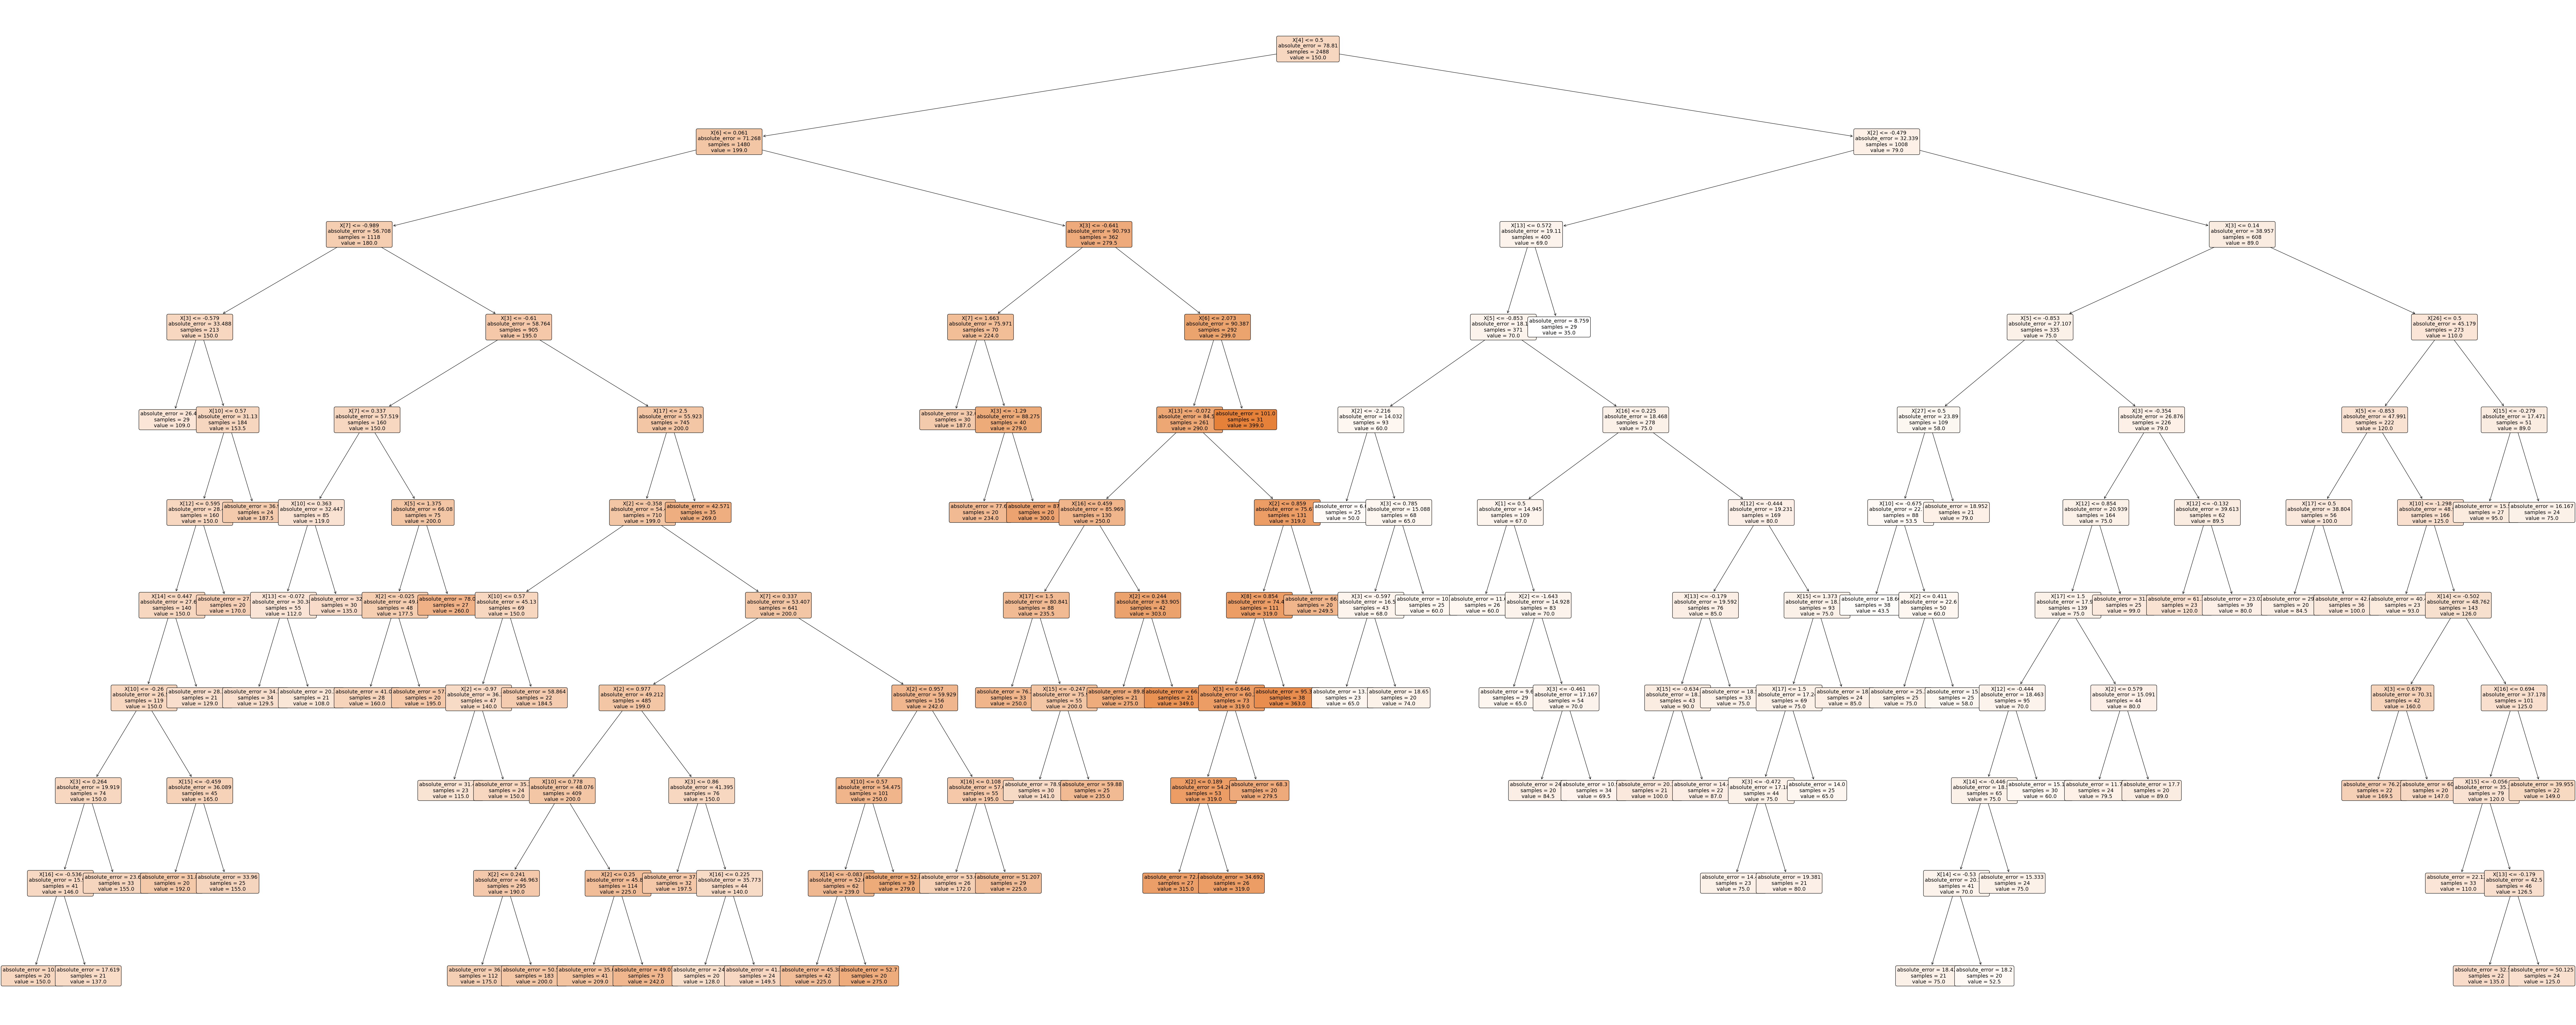

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(rand_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## DTree grid search

In [16]:
score_measure = "neg_mean_squared_error"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
The best neg_mean_squared_error score is -4853.416447076031
... with parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'max_leaf_nodes': 198, 'min_impurity_decrease': 0.00045000000000000004, 'min_samples_leaf': 20, 'min_samples_split': 11}


## 5.0 Importance of features

In [17]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.08, 0.58, 0.01, 0.1 , 0.06, 0.  , 0.  , 0.02,
       0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

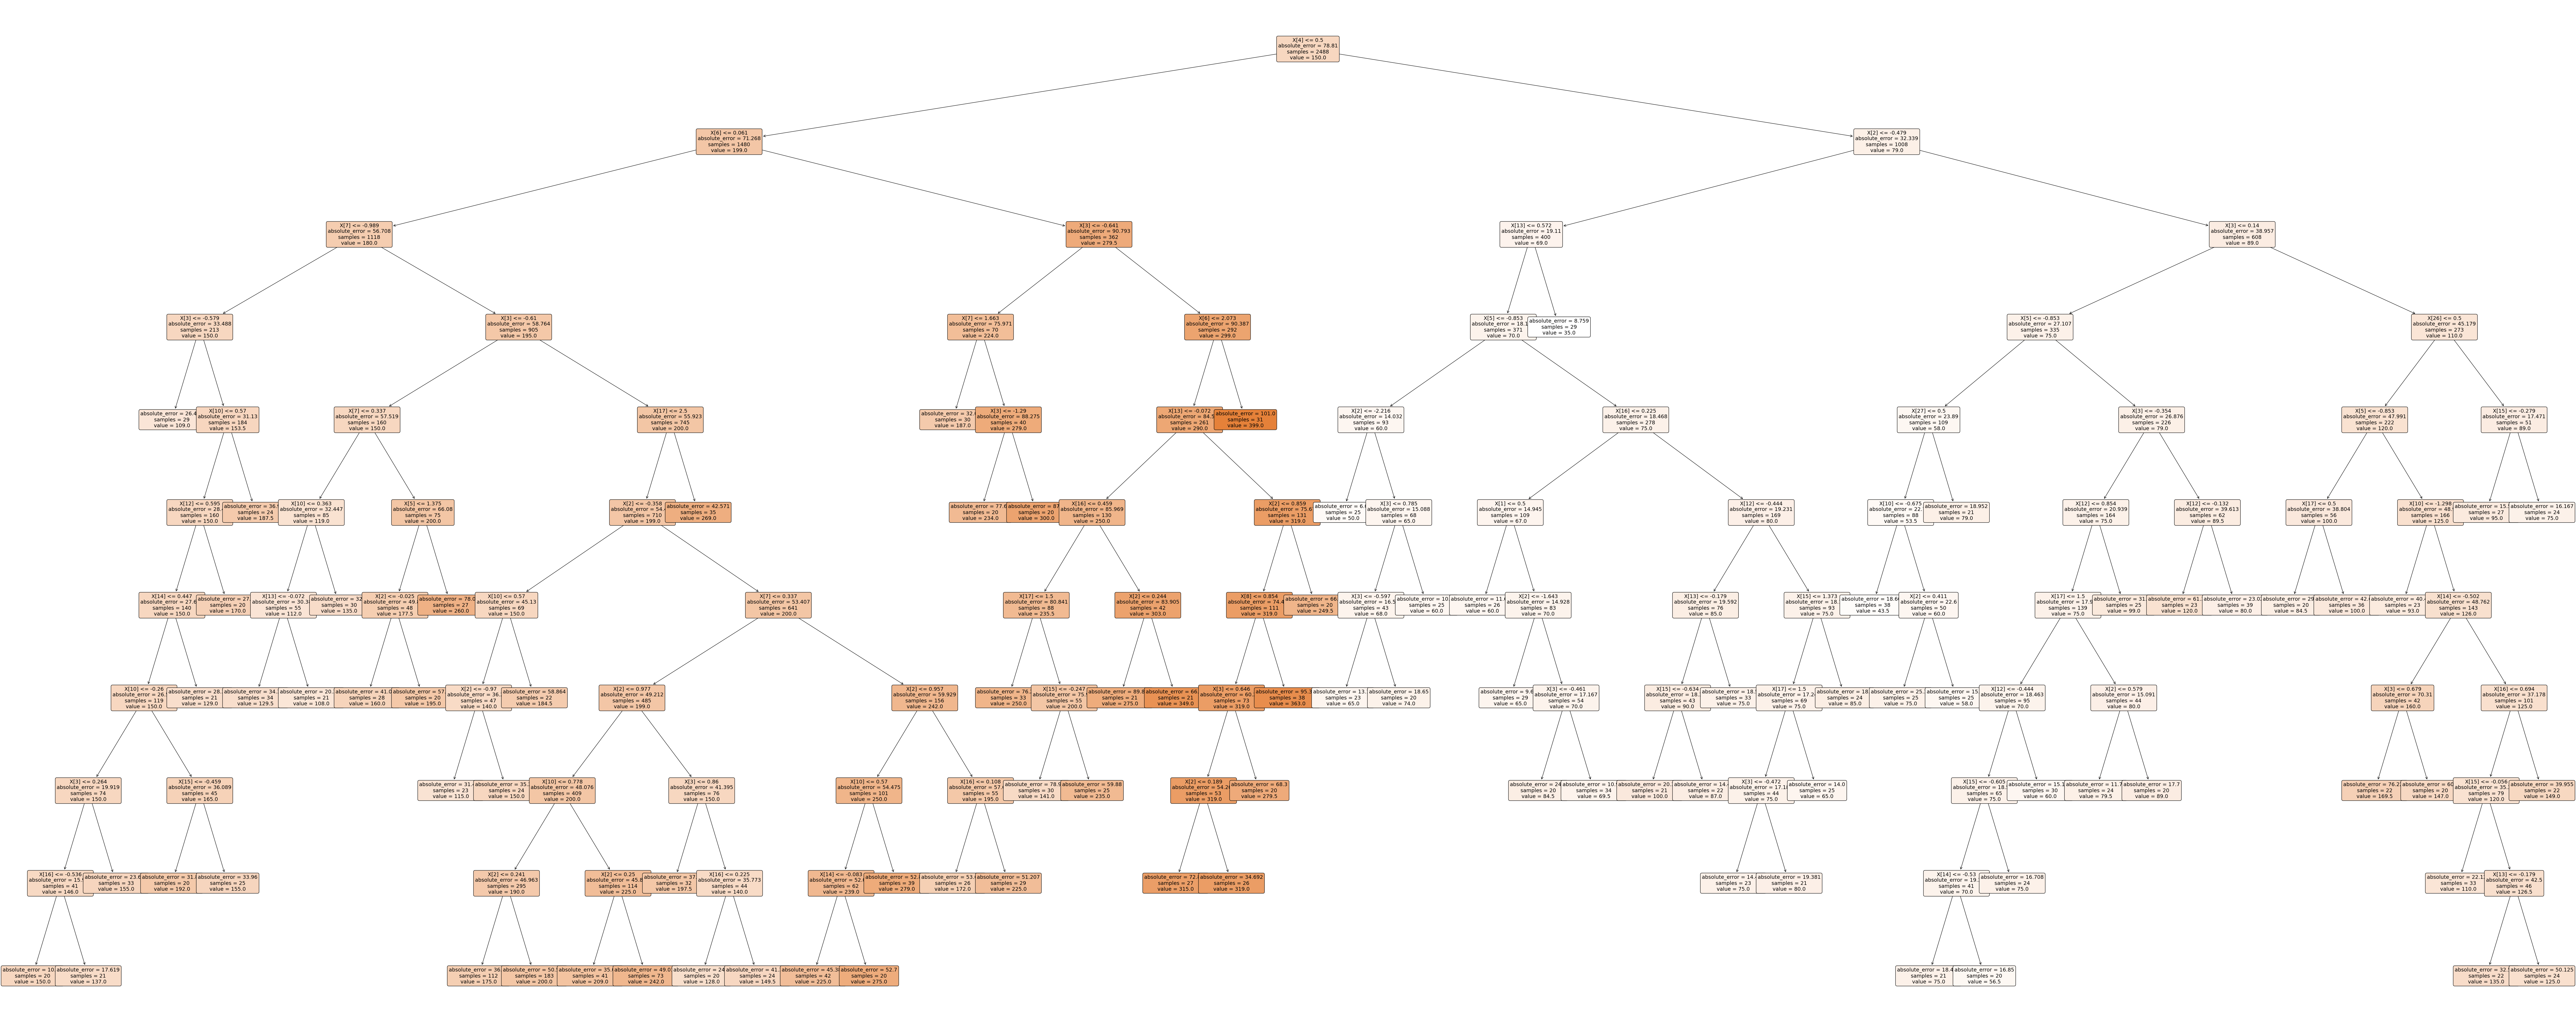

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)